In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.5f}'.format)
import numpy as np

In [3]:
%%bash
ls -l /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected | grep -v '^d'

total 25654620
-rw-r--r--. 1 nnagarajan nnagarajan  1404487328 Oct 18 19:24 gdx_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan   789822644 Oct 18 19:24 slv_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan  5366864230 Oct 18 19:24 soxs-k_20250103_20250131.csv
-rw-r--r--. 1 nnagarajan nnagarajan 18709150170 Oct 18 19:24 spy_20250103_20250131.csv


In [ ]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/
grep "2025-01-30" spy_20250103_20250131.csv > 01302025/spy.csv
grep "2025-01-30" slv_20250103_20250131.csv > 01302025/slv.csv
grep "2025-01-30" gdx_20250103_20250131.csv > 01302025/gdx.csv
grep "2025-01-30" soxs-k_20250103_20250131.csv > 01302025/soxs.csv

In [7]:
%%bash
cd /home/nnagarajan/github/DNNLOB-FA800/data/etf/jan2025/selected/

header=$(head -n 1 spy_20250103_20250131.csv)
for f in 01302025/spy.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 soxs-k_20250103_20250131.csv)
for f in 01302025/soxs.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 slv_20250103_20250131.csv)
for f in 01302025/slv.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

header=$(head -n 1 gdx_20250103_20250131.csv)
for f in 01302025/gdx.csv; do
    tmp=$(mktemp)
    echo "$header" > "$tmp"
    cat "$f" >> "$tmp"
    mv "$tmp" "$f"
done

In [2]:
#df=pd.read_csv("data/etf/jan2025/selected/01302025/spy.csv",engine="pyarrow", sep = ',')
df=pd.read_csv("data/etf/jan2025/selected/soxs-k_20250103_20250131.csv",engine="pyarrow", sep = ',')
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")
df.head(3)

,#RIC,Domain,Date-Time,Type,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,...,L23-AskPrice,L23-AskSize,L24-BidPrice,L24-BidSize,L24-AskPrice,L24-AskSize,L25-BidPrice,L25-BidSize,L25-AskPrice,L25-AskSize
0,SOXS.K,Market Price,2025-01-03 00:10:00.511401066-05:00,Normalized LL2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SOXS.K,Market Price,2025-01-03 07:00:00.026209690-05:00,Normalized LL2,21.71000,100.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SOXS.K,Market Price,2025-01-03 07:00:00.026209690-05:00,Normalized LL2,21.71000,100.00000,NaN,NaN,21.70000,100.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.DataFrame(pd.to_datetime(df["Date-Time"]).dt.date.unique())

,0
0,2025-01-03
1,2025-01-06
2,2025-01-07
3,2025-01-08
4,2025-01-10
5,2025-01-13
6,2025-01-14
7,2025-01-15
8,2025-01-16
9,2025-01-17


In [4]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
grouped = df.groupby("Date").size().reset_index(name="Count")


In [5]:
# Filter only regular market hours (09:30–16:00 Eastern)
df_market = df[
    (df["Date-Time"].dt.time >= pd.to_datetime("09:40:00").time()) &
    (df["Date-Time"].dt.time <= pd.to_datetime("15:50:00").time())
]

In [6]:
del df

In [7]:
base_cols = ["#RIC", "Date-Time"]
#base_cols = ["#RIC"]
# Dynamically build list for L1–L10
levels = []
for i in range(1, 11):  # L1–L10 inclusive
    levels += [
        f"L{i}-BidPrice", f"L{i}-BidSize",
        f"L{i}-AskPrice", f"L{i}-AskSize"
    ]


In [8]:
df_market_l10 = df_market[base_cols + levels]

In [9]:
del df_market

In [10]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
36747,SOXS.K,2025-01-03 09:40:00.006514971-05:00,21.30000,100.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,21.29000,800.00000,21.31000,2600.00000,21.28000,900.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.21000,100.00000,21.43000,100.00000,21.20000,100.00000,21.44000,2300.00000
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,21.30000,600.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36750,SOXS.K,2025-01-03 09:40:00.016467552-05:00,21.30000,700.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36751,SOXS.K,2025-01-03 09:40:00.021517897-05:00,21.30000,700.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36752,SOXS.K,2025-01-03 09:40:00.056315268-05:00,21.30000,700.00000,21.31000,2000.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36753,SOXS.K,2025-01-03 09:40:00.069284280-05:00,21.30000,1000.00000,21.31000,2000.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36754,SOXS.K,2025-01-03 09:40:00.069284280-05:00,21.30000,1000.00000,21.31000,1900.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36755,SOXS.K,2025-01-03 09:40:00.076256984-05:00,21.30000,1000.00000,21.31000,1900.00000,21.29000,800.00000,21.32000,1300.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36756,SOXS.K,2025-01-03 09:40:00.076256984-05:00,21.30000,1100.00000,21.31000,1900.00000,21.29000,800.00000,21.32000,1300.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000


In [11]:
price_cols = df_market_l10.filter(regex=r'^L(?:10|[1-9])-(?:Bid|Ask)Price$').columns

# Keep only rows where ANY price column changed vs the previous row
changed = df_market_l10[price_cols].ne(df_market_l10[price_cols].shift()).any(axis=1)
df_filtered = df_market_l10[changed].copy()

In [12]:
print(df_filtered.size)
print(df_market_l10.size)

48842178
587923518


In [13]:
df_market_l10=df_filtered

In [14]:
df_market_l10["ms_timestamp"] = df_market_l10["Date-Time"].dt.floor("ns")
df_market_l10 = (
    df_market_l10.drop_duplicates(subset=["#RIC", "ms_timestamp"], keep="last")
      .drop(columns="ms_timestamp")
)
df_market_l10=df_market_l10.dropna()

In [15]:
df_market_l10.size

40353810

In [16]:
df_market_l10.head(10)

,#RIC,Date-Time,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,21.29000,800.00000,21.31000,2600.00000,21.28000,900.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.21000,100.00000,21.43000,100.00000,21.20000,100.00000,21.44000,2300.00000
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,21.30000,600.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36758,SOXS.K,2025-01-03 09:40:00.076256984-05:00,21.30000,1100.00000,21.32000,1300.00000,21.29000,800.00000,21.33000,3200.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36762,SOXS.K,2025-01-03 09:40:00.081235935-05:00,21.31000,600.00000,21.32000,1300.00000,21.30000,2400.00000,21.33000,3200.00000,...,21.43000,100.00000,21.23000,2000.00000,21.44000,2300.00000,21.22000,100.00000,21.52000,2300.00000
36777,SOXS.K,2025-01-03 09:40:00.116134193-05:00,21.30000,800.00000,21.32000,3900.00000,21.29000,2700.00000,21.33000,3200.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36784,SOXS.K,2025-01-03 09:40:00.126062523-05:00,21.31000,600.00000,21.32000,3900.00000,21.30000,700.00000,21.33000,3200.00000,...,21.43000,100.00000,21.23000,2000.00000,21.44000,2300.00000,21.22000,100.00000,21.52000,2300.00000
36789,SOXS.K,2025-01-03 09:40:00.131044286-05:00,21.30000,700.00000,21.32000,3900.00000,21.29000,800.00000,21.33000,3200.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36791,SOXS.K,2025-01-03 09:40:00.156879201-05:00,21.30000,1900.00000,21.31000,1200.00000,21.29000,800.00000,21.32000,3900.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36814,SOXS.K,2025-01-03 09:40:00.241564103-05:00,21.30000,1000.00000,21.32000,3200.00000,21.29000,800.00000,21.33000,3200.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36821,SOXS.K,2025-01-03 09:40:00.346022423-05:00,21.30000,1000.00000,21.31000,600.00000,21.29000,800.00000,21.32000,3200.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000


In [19]:
#df_market_l10.drop("mid_price",axis=1, inplace=True)
#df_market_l10.drop("abs.spread",axis=1, inplace=True)
#df_market_l10.drop("rel.spread",axis=1, inplace=True)

In [17]:
df_market_l10.insert(
            2, "mid_price", (df_market_l10["L1-BidPrice"] + df_market_l10["L1-AskPrice"]) / 2
        )  # Add the mid-price column to the orderbook dataframe.
#df_market_l10.mid_price = df_market_l10.mid_price.astype(int)

In [18]:
df_market_l10.insert(
            2, "abs.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])
        )
df_market_l10.insert(
            2, "rel.spread", (df_market_l10["L1-AskPrice"] - df_market_l10["L1-BidPrice"])/df_market_l10["mid_price"]
        )

In [19]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.00094,0.02000,21.30000,21.29000,800.00000,21.31000,2600.00000,21.28000,...,21.38000,1900.00000,21.21000,100.00000,21.43000,100.00000,21.20000,100.00000,21.44000,2300.00000
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.00047,0.01000,21.30500,21.30000,600.00000,21.31000,2600.00000,21.29000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36758,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.00094,0.02000,21.31000,21.30000,1100.00000,21.32000,1300.00000,21.29000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36762,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,1300.00000,21.30000,...,21.43000,100.00000,21.23000,2000.00000,21.44000,2300.00000,21.22000,100.00000,21.52000,2300.00000
36777,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.00094,0.02000,21.31000,21.30000,800.00000,21.32000,3900.00000,21.29000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36784,SOXS.K,2025-01-03 09:40:00.126062523-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,3900.00000,21.30000,...,21.43000,100.00000,21.23000,2000.00000,21.44000,2300.00000,21.22000,100.00000,21.52000,2300.00000
36789,SOXS.K,2025-01-03 09:40:00.131044286-05:00,0.00094,0.02000,21.31000,21.30000,700.00000,21.32000,3900.00000,21.29000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36791,SOXS.K,2025-01-03 09:40:00.156879201-05:00,0.00047,0.01000,21.30500,21.30000,1900.00000,21.31000,1200.00000,21.29000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36814,SOXS.K,2025-01-03 09:40:00.241564103-05:00,0.00094,0.02000,21.31000,21.30000,1000.00000,21.32000,3200.00000,21.29000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36821,SOXS.K,2025-01-03 09:40:00.346022423-05:00,0.00047,0.01000,21.30500,21.30000,1000.00000,21.31000,600.00000,21.29000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000


In [28]:
print(sum(round(df_market_l10["abs.spread"],2)==float(0.01)))
tick_size=sum(round(df_market_l10["abs.spread"],2)==float(0.01))/df_market_l10.size
print(tick_size)

516409
0.010538732278315232


In [29]:
horizons=(10,50,100)
rolling_mid = df_market_l10["mid_price"]
rolling_mid = rolling_mid.to_numpy().flatten()
for h in horizons:
        delta_ticks = (rolling_mid[h:] - df_market_l10["mid_price"][:-h])
        df_market_l10[f"Raw_Target_{str(h)}"] = delta_ticks

In [30]:
df_market_l10.head(10)

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.00094,0.02000,21.30000,21.29000,800.00000,21.31000,2600.00000,21.28000,...,21.20000,100.00000,21.44000,2300.00000,0.00000,-0.01000,-0.01000,0,0,0
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.00047,0.01000,21.30500,21.30000,600.00000,21.31000,2600.00000,21.29000,...,21.21000,100.00000,21.44000,2300.00000,-0.00500,-0.02000,-0.01000,0,1,0
36758,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.00094,0.02000,21.31000,21.30000,1100.00000,21.32000,1300.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.00500,-0.02000,-0.02000,0,1,1
36762,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,1300.00000,21.30000,...,21.22000,100.00000,21.52000,2300.00000,-0.01500,-0.03000,-0.02000,1,1,1
36777,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.00094,0.02000,21.31000,21.30000,800.00000,21.32000,3900.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.01500,-0.02000,-0.01500,1,1,1
36784,SOXS.K,2025-01-03 09:40:00.126062523-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,3900.00000,21.30000,...,21.22000,100.00000,21.52000,2300.00000,-0.02500,-0.03000,-0.02000,1,1,1
36789,SOXS.K,2025-01-03 09:40:00.131044286-05:00,0.00094,0.02000,21.31000,21.30000,700.00000,21.32000,3900.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.01500,-0.02500,-0.01500,1,1,1
36791,SOXS.K,2025-01-03 09:40:00.156879201-05:00,0.00047,0.01000,21.30500,21.30000,1900.00000,21.31000,1200.00000,21.29000,...,21.21000,100.00000,21.44000,2300.00000,-0.01500,-0.01500,-0.01500,1,1,1
36814,SOXS.K,2025-01-03 09:40:00.241564103-05:00,0.00094,0.02000,21.31000,21.30000,1000.00000,21.32000,3200.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.02500,-0.01500,-0.01500,1,1,1
36821,SOXS.K,2025-01-03 09:40:00.346022423-05:00,0.00047,0.01000,21.30500,21.30000,1000.00000,21.31000,600.00000,21.29000,...,21.21000,100.00000,21.44000,2300.00000,-0.01500,-0.01500,-0.00500,1,1,0


In [31]:
df_market_l10.describe()

,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
count,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,960805.00000,...,960805.00000,960805.00000,960805.00000,960805.00000,960795.00000,960755.00000,960705.00000,960805.00000,960805.00000,960805.00000
mean,0.00074,0.01506,20.41549,20.40796,2399.87394,20.42302,2452.64417,20.39790,3161.48238,20.43315,...,20.31753,716.74755,20.57047,2668.61947,-0.00001,-0.00004,-0.00008,0.53485,1.01517,1.15863
std,0.00041,0.00832,1.63248,1.63245,2223.31754,1.63252,2217.52323,1.63250,2073.71869,1.63254,...,1.63241,1505.34699,1.64100,3357.00556,0.01967,0.04372,0.06192,0.77813,0.81504,0.76803
min,0.00043,0.01000,16.35500,16.35000,1.00000,16.36000,1.00000,16.34000,3.00000,16.37000,...,15.24000,2.00000,16.45000,1.00000,-2.24000,-2.30000,-2.29000,0.00000,0.00000,0.00000
25%,0.00048,0.01000,19.01500,19.01000,700.00000,19.02000,700.00000,19.00000,1600.00000,19.03000,...,18.92000,100.00000,19.15000,100.00000,-0.00500,-0.01500,-0.02500,0.00000,0.00000,1.00000
50%,0.00056,0.01000,20.83500,20.83000,1800.00000,20.84000,1800.00000,20.82000,2900.00000,20.85000,...,20.74000,200.00000,21.01000,2300.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
75%,0.00095,0.02000,21.79500,21.79000,3500.00000,21.80000,3600.00000,21.78000,4200.00000,21.81000,...,21.70000,500.00000,21.96000,2700.00000,0.00500,0.01500,0.02500,1.00000,2.00000,2.00000
max,0.01985,0.44000,23.46000,23.45000,21611.00000,23.49000,20031.00000,23.44000,25826.00000,23.53000,...,23.36000,15500.00000,26.02000,15600.00000,2.90000,2.94500,2.99500,2.00000,2.00000,2.00000


In [32]:
#df = df_market_l10.set_index("Date-Time",drop=True,inplace=True)

In [33]:
theta=0.01
df_market_l10["Target_10"] = np.where(df_market_l10["Raw_Target_10"] > theta, 2, np.where(df_market_l10["Raw_Target_10"] < -theta, 1,0))
df_market_l10["Target_50"] = np.where(df_market_l10["Raw_Target_50"] > theta, 2, np.where(df_market_l10["Raw_Target_50"] < -theta, 1,0))
df_market_l10["Target_100"] = np.where(df_market_l10["Raw_Target_100"] > theta, 2, np.where(df_market_l10["Raw_Target_100"] < -theta, 1,0))

In [34]:
#df_market_l10.to_csv("data/etf/jan2025/selected/l10/soxs_l10.csv",index=False)

In [35]:
# Convert Series to DataFrame
class_summary = df_market_l10.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)

print(class_summary)

   Target_100   Count  Percent
0           0  219258 22.82000
1           1  369880 38.50000
2           2  371667 38.68000


In [36]:
df_market_l10

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.00094,0.02000,21.30000,21.29000,800.00000,21.31000,2600.00000,21.28000,...,21.20000,100.00000,21.44000,2300.00000,0.00000,-0.01000,-0.01000,0,0,0
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.00047,0.01000,21.30500,21.30000,600.00000,21.31000,2600.00000,21.29000,...,21.21000,100.00000,21.44000,2300.00000,-0.00500,-0.02000,-0.01000,0,1,0
36758,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.00094,0.02000,21.31000,21.30000,1100.00000,21.32000,1300.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.00500,-0.02000,-0.02000,0,1,1
36762,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,1300.00000,21.30000,...,21.22000,100.00000,21.52000,2300.00000,-0.01500,-0.03000,-0.02000,1,1,1
36777,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.00094,0.02000,21.31000,21.30000,800.00000,21.32000,3900.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.01500,-0.02000,-0.01500,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803460,SOXS.K,2025-01-31 15:49:58.506118967-05:00,0.00097,0.02000,20.56000,20.55000,3700.00000,20.57000,1300.00000,20.54000,...,20.46000,100.00000,21.03000,100.00000,NaN,NaN,NaN,0,0,0
15803466,SOXS.K,2025-01-31 15:49:58.511100868-05:00,0.00049,0.01000,20.56500,20.56000,600.00000,20.57000,600.00000,20.55000,...,20.47000,100.00000,21.03000,100.00000,NaN,NaN,NaN,0,0,0
15803505,SOXS.K,2025-01-31 15:49:58.941228370-05:00,0.00097,0.02000,20.57000,20.56000,1400.00000,20.58000,800.00000,20.55000,...,20.47000,100.00000,21.03000,100.00000,NaN,NaN,NaN,0,0,0
15803518,SOXS.K,2025-01-31 15:49:59.701817156-05:00,0.00049,0.01000,20.56500,20.56000,700.00000,20.57000,2500.00000,20.55000,...,20.47000,100.00000,21.03000,100.00000,NaN,NaN,NaN,0,0,0


In [37]:
# z-score normalization
df_market_l10[levels]

,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,L2-BidSize,L2-AskPrice,L2-AskSize,L3-BidPrice,L3-BidSize,...,L8-AskPrice,L8-AskSize,L9-BidPrice,L9-BidSize,L9-AskPrice,L9-AskSize,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize
36748,21.29000,800.00000,21.31000,2600.00000,21.28000,900.00000,21.32000,3200.00000,21.27000,3000.00000,...,21.38000,1900.00000,21.21000,100.00000,21.43000,100.00000,21.20000,100.00000,21.44000,2300.00000
36749,21.30000,600.00000,21.31000,2600.00000,21.29000,800.00000,21.32000,3200.00000,21.28000,900.00000,...,21.38000,1900.00000,21.22000,100.00000,21.43000,100.00000,21.21000,100.00000,21.44000,2300.00000
36758,21.30000,1100.00000,21.32000,1300.00000,21.29000,800.00000,21.33000,3200.00000,21.28000,2800.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
36762,21.31000,600.00000,21.32000,1300.00000,21.30000,2400.00000,21.33000,3200.00000,21.29000,2700.00000,...,21.43000,100.00000,21.23000,2000.00000,21.44000,2300.00000,21.22000,100.00000,21.52000,2300.00000
36777,21.30000,800.00000,21.32000,3900.00000,21.29000,2700.00000,21.33000,3200.00000,21.28000,2800.00000,...,21.43000,100.00000,21.22000,100.00000,21.44000,2300.00000,21.21000,100.00000,21.52000,2300.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15803460,20.55000,3700.00000,20.57000,1300.00000,20.54000,1700.00000,20.58000,1000.00000,20.53000,2600.00000,...,20.69000,2400.00000,20.47000,100.00000,20.77000,2400.00000,20.46000,100.00000,21.03000,100.00000
15803466,20.56000,600.00000,20.57000,600.00000,20.55000,6046.00000,20.58000,1000.00000,20.54000,1700.00000,...,20.69000,2400.00000,20.48000,2500.00000,20.77000,2400.00000,20.47000,100.00000,21.03000,100.00000
15803505,20.56000,1400.00000,20.58000,800.00000,20.55000,1100.00000,20.59000,100.00000,20.54000,1100.00000,...,20.69000,2400.00000,20.48000,2500.00000,20.77000,2400.00000,20.47000,100.00000,21.03000,100.00000
15803518,20.56000,700.00000,20.57000,2500.00000,20.55000,1100.00000,20.58000,1000.00000,20.54000,1100.00000,...,20.69000,2400.00000,20.48000,2500.00000,20.77000,2400.00000,20.47000,100.00000,21.03000,100.00000


In [38]:
from scipy.stats import zscore

In [39]:
df_market_l10[~df_market_l10.isna().any(axis=1)]

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
36748,SOXS.K,2025-01-03 09:40:00.006514971-05:00,0.00094,0.02000,21.30000,21.29000,800.00000,21.31000,2600.00000,21.28000,...,21.20000,100.00000,21.44000,2300.00000,0.00000,-0.01000,-0.01000,0,0,0
36749,SOXS.K,2025-01-03 09:40:00.016467552-05:00,0.00047,0.01000,21.30500,21.30000,600.00000,21.31000,2600.00000,21.29000,...,21.21000,100.00000,21.44000,2300.00000,-0.00500,-0.02000,-0.01000,0,1,0
36758,SOXS.K,2025-01-03 09:40:00.076256984-05:00,0.00094,0.02000,21.31000,21.30000,1100.00000,21.32000,1300.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.00500,-0.02000,-0.02000,0,1,1
36762,SOXS.K,2025-01-03 09:40:00.081235935-05:00,0.00047,0.01000,21.31500,21.31000,600.00000,21.32000,1300.00000,21.30000,...,21.22000,100.00000,21.52000,2300.00000,-0.01500,-0.03000,-0.02000,1,1,1
36777,SOXS.K,2025-01-03 09:40:00.116134193-05:00,0.00094,0.02000,21.31000,21.30000,800.00000,21.32000,3900.00000,21.29000,...,21.21000,100.00000,21.52000,2300.00000,-0.01500,-0.02000,-0.01500,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15801381,SOXS.K,2025-01-31 15:49:23.762679437-05:00,0.00049,0.01000,20.54500,20.54000,2100.00000,20.55000,2400.00000,20.53000,...,20.45000,100.00000,20.75000,2400.00000,-0.00500,0.01500,0.01500,0,2,2
15801467,SOXS.K,2025-01-31 15:49:24.781103838-05:00,0.00097,0.02000,20.54000,20.53000,4200.00000,20.55000,7200.00000,20.52000,...,20.44000,200.00000,20.75000,2400.00000,-0.00500,0.02500,0.02500,0,2,2
15801473,SOXS.K,2025-01-31 15:49:24.975299814-05:00,0.00049,0.01000,20.53500,20.53000,4000.00000,20.54000,600.00000,20.52000,...,20.44000,200.00000,20.69000,2400.00000,0.00500,0.04000,0.03500,0,2,2
15801492,SOXS.K,2025-01-31 15:49:24.981254272-05:00,0.00097,0.02000,20.54000,20.53000,4800.00000,20.55000,2500.00000,20.52000,...,20.44000,200.00000,20.75000,2400.00000,-0.00500,0.02500,0.02500,0,2,2


/tmp/ipykernel_966120/1027787305.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX", start="2025-01-01", progress=False)


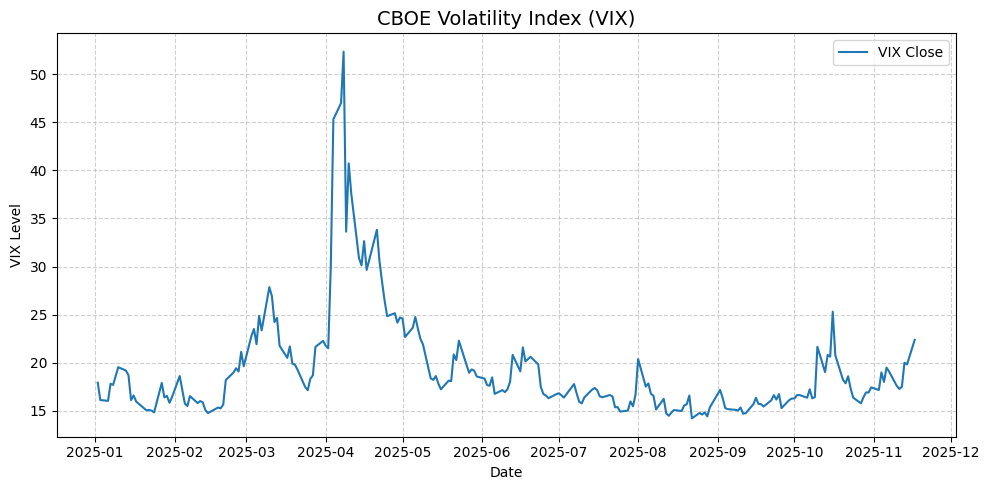

In [40]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download VIX data (symbol: ^VIX)
vix = yf.download("^VIX", start="2025-01-01", progress=False)

# Inspect columns
# print(vix.head())

# Plot the closing price
plt.figure(figsize=(10, 5))
plt.plot(vix.index, vix["Close"], label="VIX Close", linewidth=1.5)
plt.title("CBOE Volatility Index (VIX)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [303]:
!pip install pandas_market_calendars


  Using cached pandas_market_calendars-5.1.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl.metadata (2.8 kB)
Using cached pandas_market_calendars-5.1.1-py3-none-any.whl (127 kB)
Using cached korean_lunar_calendar-0.3.1-py3-none-any.whl (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [pandas_market_calendars]ge-calendars]


In [318]:
import pandas_market_calendars as mcal

nyse = mcal.get_calendar('NYSE')
#schedule = nyse.schedule(start_date='2025-01-13', end_date='2025-02-01')
trading_days = nyse.valid_days(start_date='2025-02-05', end_date='2025-02-09')

print("Number of NYSE trading days:", len(trading_days))
#print("Number of NYSE trading days:", schedule)


Number of NYSE trading days: 3


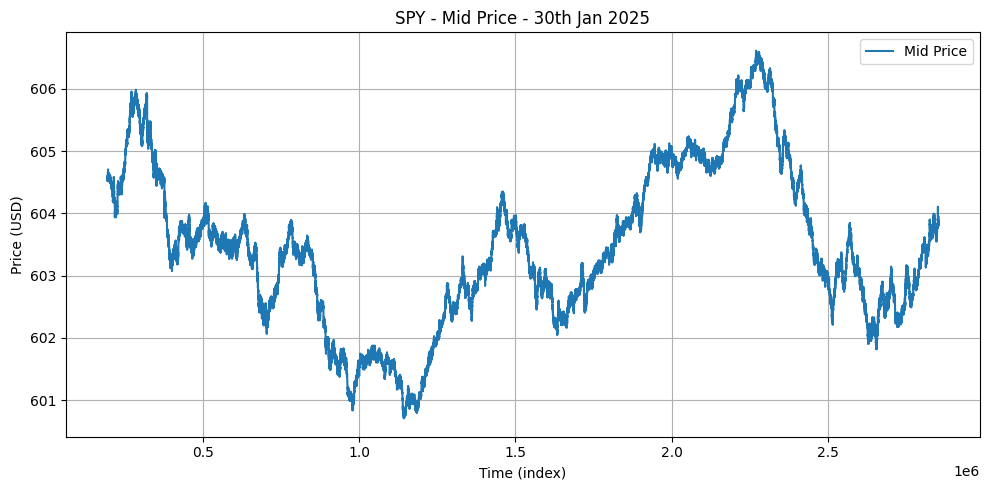

In [358]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
plt.figure(figsize=(10, 5))

plt.plot(df_market_l10['mid_price'], label='Mid Price')
#plt.plot(df_market_l10['L1-BidPrice'], label='L1 Bid Price')
#plt.plot(df_market_l10['L1-AskPrice'], label='L1 Ask Price')

plt.title('SPY - Mid Price - 30th Jan 2025')
plt.xlabel('Time (index)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




In [41]:
df_market_l10[~df_market_l10.isna().any(axis=1)].to_csv("data/etf/jan2025/cleaned/soxs_cleaned_jan2025.csv", index=False)